# OPTIMIZACIÓN DE CUANTIFICADORES - SUBBANDAS

## MÉTODO LAGRANGE - BIT ALLOCATE

### 1.- Importar librerias necesarias para el desarrollo del ejem

In [32]:
import urllib.request
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage.metrics
import scipy.stats
import os
import sys
import os.path as pathnuevo
import shutil

### 2.- Creamos los directorios¶

In [3]:
for i in [2]:
    for q_step in [16,32,64,128,256,512]:
        directorio= "/multimedia/imagenescuantificadas"+str(i)+str(q_step)
        if pathnuevo.exists(directorio):
        #os.rmdir(directorio)
        #shutil.rmtree(directorio)
            shutil.rmtree(directorio, ignore_errors=True)

In [13]:
for i in [2]:
    for q_step in [16,32,64,128,256,512]:
        directorio= "/multimedia/imagenescuantificadasbandaconsolidada"+str(i)+str(q_step)
        if pathnuevo.exists(directorio):
        #os.rmdir(directorio)
        #shutil.rmtree(directorio)
            shutil.rmtree(directorio, ignore_errors=True)

### 3.- Limpiamos los directorios - Almacenan imagenes cuantificadas¶

In [5]:
for i in [2]:
    for q_step in [16,32,64,128,256,512]:
        for j in [0,1,2,3,4,5,6,7]:
            comand= "rm -rf /multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+"/H*00"+str(j)+".png"
            print(comand)
            os.system(comand)
            comand= "rm -rf /multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+"/L*00"+str(j)+".png"
            print(comand)
            os.system(comand)

rm -rf /multimedia/imagenescuantificadasbanda216/H*000.png
rm -rf /multimedia/imagenescuantificadasbanda216/L*000.png
rm -rf /multimedia/imagenescuantificadasbanda216/H*001.png
rm -rf /multimedia/imagenescuantificadasbanda216/L*001.png
rm -rf /multimedia/imagenescuantificadasbanda216/H*002.png
rm -rf /multimedia/imagenescuantificadasbanda216/L*002.png
rm -rf /multimedia/imagenescuantificadasbanda216/H*003.png
rm -rf /multimedia/imagenescuantificadasbanda216/L*003.png
rm -rf /multimedia/imagenescuantificadasbanda216/H*004.png
rm -rf /multimedia/imagenescuantificadasbanda216/L*004.png
rm -rf /multimedia/imagenescuantificadasbanda216/H*005.png
rm -rf /multimedia/imagenescuantificadasbanda216/L*005.png
rm -rf /multimedia/imagenescuantificadasbanda216/H*006.png
rm -rf /multimedia/imagenescuantificadasbanda216/L*006.png
rm -rf /multimedia/imagenescuantificadasbanda216/H*007.png
rm -rf /multimedia/imagenescuantificadasbanda216/L*007.png
rm -rf /multimedia/imagenescuantificadasbanda232/H*000.p

###  Función para aplicar cuantizador ("deadzone")


In [6]:
def quantificacion(i,t_gop):
    for q_step in [16,32,64,128,256,512]:
        directorio= "/multimedia/imagenescuantificadas"+str(i)+str(q_step)
        print(directorio)
        os.makedirs(directorio)
        for k in range(0, t_gop):
            #print(k)
            for l in ["LL","LH","HL","HH"]:
                path="python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/"+str(l)+"00"+str(k)+".png -o "+directorio+"/"+str(l)+"00"+str(k)+".png -q "+str(q_step)+" -c "+str(i) 
                os.system(path)
                print(path)
    print (i)
   

### 5.- Instanciamos función "quantificacion"¶

In [7]:
t_gop=8
for i in [2]:
    quantificacion(i,t_gop)

/multimedia/imagenescuantificadas216
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LL000.png -o /multimedia/imagenescuantificadas216/LL000.png -q 16 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LH000.png -o /multimedia/imagenescuantificadas216/LH000.png -q 16 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HL000.png -o /multimedia/imagenescuantificadas216/HL000.png -q 16 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HH000.png -o /multimedia/imagenescuantificadas216/HH000.png -q 16 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LL001.png -o /multimedia/imagenescuantificadas216/LL001.png -q 16 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LH001.png -o /multimedia/imagenescuantificadas216/LH001.png -q 16 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HL001.png -o /multimedia/imagenescuantificadas2

python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LL007.png -o /multimedia/imagenescuantificadas232/LL007.png -q 32 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LH007.png -o /multimedia/imagenescuantificadas232/LH007.png -q 32 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HL007.png -o /multimedia/imagenescuantificadas232/HL007.png -q 32 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HH007.png -o /multimedia/imagenescuantificadas232/HH007.png -q 32 -c 2
/multimedia/imagenescuantificadas264
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LL000.png -o /multimedia/imagenescuantificadas264/LL000.png -q 64 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LH000.png -o /multimedia/imagenescuantificadas264/LH000.png -q 64 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HL000.png -o /multimedia/imagenescuantificadas2

python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HL005.png -o /multimedia/imagenescuantificadas2128/HL005.png -q 128 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HH005.png -o /multimedia/imagenescuantificadas2128/HH005.png -q 128 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LL006.png -o /multimedia/imagenescuantificadas2128/LL006.png -q 128 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LH006.png -o /multimedia/imagenescuantificadas2128/LH006.png -q 128 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HL006.png -o /multimedia/imagenescuantificadas2128/HL006.png -q 128 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HH006.png -o /multimedia/imagenescuantificadas2128/HH006.png -q 128 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LL007.png -o /multimedia/imagenescuantificadas2128/LL007.png -q 128 -c 2

python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HH003.png -o /multimedia/imagenescuantificadas2512/HH003.png -q 512 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LL004.png -o /multimedia/imagenescuantificadas2512/LL004.png -q 512 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LH004.png -o /multimedia/imagenescuantificadas2512/LH004.png -q 512 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HL004.png -o /multimedia/imagenescuantificadas2512/HL004.png -q 512 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/HH004.png -o /multimedia/imagenescuantificadas2512/HH004.png -q 512 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LL005.png -o /multimedia/imagenescuantificadas2512/LL005.png -q 512 -c 2
python3 ../tools/quantize.py -i /multimedia/imagenestransformadamcdwt/LH005.png -o /multimedia/imagenescuantificadas2512/LH005.png -q 512 -c 2

### 6.- Proceso que setea las imagenes a "peso 0" y las clasifica en diferentes directorios

In [9]:
i=2
#subbanda=[LL,HL,LH,HH]
for q_step in [16,32,64,128,256,512]:
    for j in [0,1,2,3,4,5,6,7]:
        for k in ["LL","HL","LH","HH"]:
            directorio= "/multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"
            print(directorio)
            if pathnuevo.exists(directorio):
                shutil.rmtree(directorio, ignore_errors=True)
            else:
                os.makedirs(directorio)
            if k == "LL":
                for l in ["LL","HL","LH","HH"]: 
                    if l =="LL":
                        comand= "cp -r /multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png /multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png"
                        print(comand)
                        os.system(comand)
                        print(k+"----")
                    else:
                        comand= "dd if=/multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png of=/multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png bs=1 count=0"
                        os.system(comand)
                        print (comand)
                        print(k+"----")
            elif k == "HL":  
                for l in ["LL","HL","LH","HH"]: 
                    if l =="HL":
                        comand= "cp -r /multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png /multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png"
                        print(comand)
                        os.system(comand)
                        print(k+"----")
                    else:
                        comand= "dd if=/multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png of=/multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png bs=1 count=0"
                        os.system(comand)
                        print (comand)
                        print(k+"----")
            
            elif k == "LH":
                 for l in ["LL","HL","LH","HH"]: 
                    if l =="LH":
                        comand= "cp -r /multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png /multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png"
                        print(comand)
                        os.system(comand)
                        print(k+"----")
                    else:
                        comand= "dd if=/multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png of=/multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png bs=1 count=0"
                        os.system(comand)
                        print (comand)
                        print(k+"----")
                    #comand= "cp -r /multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png /multimedia/imagenescuantificadasbanda"+str(i)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png"
                    #print(comand)
                    #os.system(comand)
            elif k == "HH":
                for l in ["LL","HL","LH","HH"]: 
                    if l =="HH":
                        comand= "cp -r /multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png /multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png"
                        print(comand)
                        os.system(comand)
                        print(k+"----")
                    else:
                        comand= "dd if=/multimedia/imagenescuantificadas"+str(i)+"/"+str(l)+"00"+str(j)+".png of=/multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/"+str(l)+"00"+str(j)+".png bs=1 count=0"
                        os.system(comand)
                        print (comand)
                    print(k+"----")

/multimedia/imagenescuantificadasbanda2160LL/
cp -r /multimedia/imagenescuantificadas2/LL000.png /multimedia/imagenescuantificadasbanda2160LL/LL000.png
LL----
dd if=/multimedia/imagenescuantificadas2/HL000.png of=/multimedia/imagenescuantificadasbanda2160LL/HL000.png bs=1 count=0
LL----
dd if=/multimedia/imagenescuantificadas2/LH000.png of=/multimedia/imagenescuantificadasbanda2160LL/LH000.png bs=1 count=0
LL----
dd if=/multimedia/imagenescuantificadas2/HH000.png of=/multimedia/imagenescuantificadasbanda2160LL/HH000.png bs=1 count=0
LL----
/multimedia/imagenescuantificadasbanda2160HL/
dd if=/multimedia/imagenescuantificadas2/LL000.png of=/multimedia/imagenescuantificadasbanda2160HL/LL000.png bs=1 count=0
HL----
cp -r /multimedia/imagenescuantificadas2/HL000.png /multimedia/imagenescuantificadasbanda2160HL/HL000.png
HL----
dd if=/multimedia/imagenescuantificadas2/LH000.png of=/multimedia/imagenescuantificadasbanda2160HL/LH000.png bs=1 count=0
HL----
dd if=/multimedia/imagenescuantificad

HL----
dd if=/multimedia/imagenescuantificadas2/LH007.png of=/multimedia/imagenescuantificadasbanda2167HL/LH007.png bs=1 count=0
HL----
dd if=/multimedia/imagenescuantificadas2/HH007.png of=/multimedia/imagenescuantificadasbanda2167HL/HH007.png bs=1 count=0
HL----
/multimedia/imagenescuantificadasbanda2167LH/
dd if=/multimedia/imagenescuantificadas2/LL007.png of=/multimedia/imagenescuantificadasbanda2167LH/LL007.png bs=1 count=0
LH----
dd if=/multimedia/imagenescuantificadas2/HL007.png of=/multimedia/imagenescuantificadasbanda2167LH/HL007.png bs=1 count=0
LH----
cp -r /multimedia/imagenescuantificadas2/LH007.png /multimedia/imagenescuantificadasbanda2167LH/LH007.png
LH----
dd if=/multimedia/imagenescuantificadas2/HH007.png of=/multimedia/imagenescuantificadasbanda2167LH/HH007.png bs=1 count=0
LH----
/multimedia/imagenescuantificadasbanda2167HH/
dd if=/multimedia/imagenescuantificadas2/LL007.png of=/multimedia/imagenescuantificadasbanda2167HH/LL007.png bs=1 count=0
HH----
dd if=/multime

dd if=/multimedia/imagenescuantificadas2/LL003.png of=/multimedia/imagenescuantificadasbanda2323HL/LL003.png bs=1 count=0
HL----
cp -r /multimedia/imagenescuantificadas2/HL003.png /multimedia/imagenescuantificadasbanda2323HL/HL003.png
HL----
dd if=/multimedia/imagenescuantificadas2/LH003.png of=/multimedia/imagenescuantificadasbanda2323HL/LH003.png bs=1 count=0
HL----
dd if=/multimedia/imagenescuantificadas2/HH003.png of=/multimedia/imagenescuantificadasbanda2323HL/HH003.png bs=1 count=0
HL----
/multimedia/imagenescuantificadasbanda2323LH/
dd if=/multimedia/imagenescuantificadas2/LL003.png of=/multimedia/imagenescuantificadasbanda2323LH/LL003.png bs=1 count=0
LH----
dd if=/multimedia/imagenescuantificadas2/HL003.png of=/multimedia/imagenescuantificadasbanda2323LH/HL003.png bs=1 count=0
LH----
cp -r /multimedia/imagenescuantificadas2/LH003.png /multimedia/imagenescuantificadasbanda2323LH/LH003.png
LH----
dd if=/multimedia/imagenescuantificadas2/HH003.png of=/multimedia/imagenescuantific

dd if=/multimedia/imagenescuantificadas2/LH007.png of=/multimedia/imagenescuantificadasbanda2327HL/LH007.png bs=1 count=0
HL----
dd if=/multimedia/imagenescuantificadas2/HH007.png of=/multimedia/imagenescuantificadasbanda2327HL/HH007.png bs=1 count=0
HL----
/multimedia/imagenescuantificadasbanda2327LH/
dd if=/multimedia/imagenescuantificadas2/LL007.png of=/multimedia/imagenescuantificadasbanda2327LH/LL007.png bs=1 count=0
LH----
dd if=/multimedia/imagenescuantificadas2/HL007.png of=/multimedia/imagenescuantificadasbanda2327LH/HL007.png bs=1 count=0
LH----
cp -r /multimedia/imagenescuantificadas2/LH007.png /multimedia/imagenescuantificadasbanda2327LH/LH007.png
LH----
dd if=/multimedia/imagenescuantificadas2/HH007.png of=/multimedia/imagenescuantificadasbanda2327LH/HH007.png bs=1 count=0
LH----
/multimedia/imagenescuantificadasbanda2327HH/
dd if=/multimedia/imagenescuantificadas2/LL007.png of=/multimedia/imagenescuantificadasbanda2327HH/LL007.png bs=1 count=0
HH----
dd if=/multimedia/ima

dd if=/multimedia/imagenescuantificadas2/HL003.png of=/multimedia/imagenescuantificadasbanda2643HH/HL003.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/LH003.png of=/multimedia/imagenescuantificadasbanda2643HH/LH003.png bs=1 count=0
HH----
cp -r /multimedia/imagenescuantificadas2/HH003.png /multimedia/imagenescuantificadasbanda2643HH/HH003.png
HH----
HH----
/multimedia/imagenescuantificadasbanda2644LL/
cp -r /multimedia/imagenescuantificadas2/LL004.png /multimedia/imagenescuantificadasbanda2644LL/LL004.png
LL----
dd if=/multimedia/imagenescuantificadas2/HL004.png of=/multimedia/imagenescuantificadasbanda2644LL/HL004.png bs=1 count=0
LL----
dd if=/multimedia/imagenescuantificadas2/LH004.png of=/multimedia/imagenescuantificadasbanda2644LL/LH004.png bs=1 count=0
LL----
dd if=/multimedia/imagenescuantificadas2/HH004.png of=/multimedia/imagenescuantificadasbanda2644LL/HH004.png bs=1 count=0
LL----
/multimedia/imagenescuantificadasbanda2644HL/
dd if=/multimedia/imagenescuan

dd if=/multimedia/imagenescuantificadas2/LL000.png of=/multimedia/imagenescuantificadasbanda21280HL/LL000.png bs=1 count=0
HL----
cp -r /multimedia/imagenescuantificadas2/HL000.png /multimedia/imagenescuantificadasbanda21280HL/HL000.png
HL----
dd if=/multimedia/imagenescuantificadas2/LH000.png of=/multimedia/imagenescuantificadasbanda21280HL/LH000.png bs=1 count=0
HL----
dd if=/multimedia/imagenescuantificadas2/HH000.png of=/multimedia/imagenescuantificadasbanda21280HL/HH000.png bs=1 count=0
HL----
/multimedia/imagenescuantificadasbanda21280LH/
dd if=/multimedia/imagenescuantificadas2/LL000.png of=/multimedia/imagenescuantificadasbanda21280LH/LL000.png bs=1 count=0
LH----
dd if=/multimedia/imagenescuantificadas2/HL000.png of=/multimedia/imagenescuantificadasbanda21280LH/HL000.png bs=1 count=0
LH----
cp -r /multimedia/imagenescuantificadas2/LH000.png /multimedia/imagenescuantificadasbanda21280LH/LH000.png
LH----
dd if=/multimedia/imagenescuantificadas2/HH000.png of=/multimedia/imagenesc

dd if=/multimedia/imagenescuantificadas2/HH004.png of=/multimedia/imagenescuantificadasbanda21284LH/HH004.png bs=1 count=0
LH----
/multimedia/imagenescuantificadasbanda21284HH/
dd if=/multimedia/imagenescuantificadas2/LL004.png of=/multimedia/imagenescuantificadasbanda21284HH/LL004.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/HL004.png of=/multimedia/imagenescuantificadasbanda21284HH/HL004.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/LH004.png of=/multimedia/imagenescuantificadasbanda21284HH/LH004.png bs=1 count=0
HH----
cp -r /multimedia/imagenescuantificadas2/HH004.png /multimedia/imagenescuantificadasbanda21284HH/HH004.png
HH----
HH----
/multimedia/imagenescuantificadasbanda21285LL/
cp -r /multimedia/imagenescuantificadas2/LL005.png /multimedia/imagenescuantificadasbanda21285LL/LL005.png
LL----
dd if=/multimedia/imagenescuantificadas2/HL005.png of=/multimedia/imagenescuantificadasbanda21285LL/HL005.png bs=1 count=0
LL----
dd if=/multimedia/ima

dd if=/multimedia/imagenescuantificadas2/HH000.png of=/multimedia/imagenescuantificadasbanda22560LH/HH000.png bs=1 count=0
LH----
/multimedia/imagenescuantificadasbanda22560HH/
dd if=/multimedia/imagenescuantificadas2/LL000.png of=/multimedia/imagenescuantificadasbanda22560HH/LL000.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/HL000.png of=/multimedia/imagenescuantificadasbanda22560HH/HL000.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/LH000.png of=/multimedia/imagenescuantificadasbanda22560HH/LH000.png bs=1 count=0
HH----
cp -r /multimedia/imagenescuantificadas2/HH000.png /multimedia/imagenescuantificadasbanda22560HH/HH000.png
HH----
HH----
/multimedia/imagenescuantificadasbanda22561LL/
cp -r /multimedia/imagenescuantificadas2/LL001.png /multimedia/imagenescuantificadasbanda22561LL/LL001.png
LL----
dd if=/multimedia/imagenescuantificadas2/HL001.png of=/multimedia/imagenescuantificadasbanda22561LL/HL001.png bs=1 count=0
LL----
dd if=/multimedia/ima

LH----
dd if=/multimedia/imagenescuantificadas2/HH004.png of=/multimedia/imagenescuantificadasbanda22564LH/HH004.png bs=1 count=0
LH----
/multimedia/imagenescuantificadasbanda22564HH/
dd if=/multimedia/imagenescuantificadas2/LL004.png of=/multimedia/imagenescuantificadasbanda22564HH/LL004.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/HL004.png of=/multimedia/imagenescuantificadasbanda22564HH/HL004.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/LH004.png of=/multimedia/imagenescuantificadasbanda22564HH/LH004.png bs=1 count=0
HH----
cp -r /multimedia/imagenescuantificadas2/HH004.png /multimedia/imagenescuantificadasbanda22564HH/HH004.png
HH----
HH----
/multimedia/imagenescuantificadasbanda22565LL/
cp -r /multimedia/imagenescuantificadas2/LL005.png /multimedia/imagenescuantificadasbanda22565LL/LL005.png
LL----
dd if=/multimedia/imagenescuantificadas2/HL005.png of=/multimedia/imagenescuantificadasbanda22565LL/HL005.png bs=1 count=0
LL----
dd if=/multime

LH----
dd if=/multimedia/imagenescuantificadas2/HH000.png of=/multimedia/imagenescuantificadasbanda25120LH/HH000.png bs=1 count=0
LH----
/multimedia/imagenescuantificadasbanda25120HH/
dd if=/multimedia/imagenescuantificadas2/LL000.png of=/multimedia/imagenescuantificadasbanda25120HH/LL000.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/HL000.png of=/multimedia/imagenescuantificadasbanda25120HH/HL000.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/LH000.png of=/multimedia/imagenescuantificadasbanda25120HH/LH000.png bs=1 count=0
HH----
cp -r /multimedia/imagenescuantificadas2/HH000.png /multimedia/imagenescuantificadasbanda25120HH/HH000.png
HH----
HH----
/multimedia/imagenescuantificadasbanda25121LL/
cp -r /multimedia/imagenescuantificadas2/LL001.png /multimedia/imagenescuantificadasbanda25121LL/LL001.png
LL----
dd if=/multimedia/imagenescuantificadas2/HL001.png of=/multimedia/imagenescuantificadasbanda25121LL/HL001.png bs=1 count=0
LL----
dd if=/multime

dd if=/multimedia/imagenescuantificadas2/HL004.png of=/multimedia/imagenescuantificadasbanda25124LH/HL004.png bs=1 count=0
LH----
cp -r /multimedia/imagenescuantificadas2/LH004.png /multimedia/imagenescuantificadasbanda25124LH/LH004.png
LH----
dd if=/multimedia/imagenescuantificadas2/HH004.png of=/multimedia/imagenescuantificadasbanda25124LH/HH004.png bs=1 count=0
LH----
/multimedia/imagenescuantificadasbanda25124HH/
dd if=/multimedia/imagenescuantificadas2/LL004.png of=/multimedia/imagenescuantificadasbanda25124HH/LL004.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/HL004.png of=/multimedia/imagenescuantificadasbanda25124HH/HL004.png bs=1 count=0
HH----
dd if=/multimedia/imagenescuantificadas2/LH004.png of=/multimedia/imagenescuantificadasbanda25124HH/LH004.png bs=1 count=0
HH----
cp -r /multimedia/imagenescuantificadas2/HH004.png /multimedia/imagenescuantificadasbanda25124HH/HH004.png
HH----
HH----
/multimedia/imagenescuantificadasbanda25125LL/
cp -r /multimedia/ima

### 7.- Aplicamos Transformada Inversa  

In [14]:
i=2
#subbanda=[LL,HL,LH,HH]
for q_step in [16,32,64,128,256,512]:
    for k in ["LL","HL","LH","HH"]:
        directorio= "/multimedia/imagenescuantificadasbandaconsolidada"+str(i)+str(q_step)+str(k)+"/"
        print(directorio)
        if pathnuevo.exists(directorio):
            shutil.rmtree(directorio, ignore_errors=True)
        else:
            os.makedirs(directorio)


/multimedia/imagenescuantificadasbandaconsolidada216LL/
/multimedia/imagenescuantificadasbandaconsolidada216HL/
/multimedia/imagenescuantificadasbandaconsolidada216LH/
/multimedia/imagenescuantificadasbandaconsolidada216HH/
/multimedia/imagenescuantificadasbandaconsolidada232LL/
/multimedia/imagenescuantificadasbandaconsolidada232HL/
/multimedia/imagenescuantificadasbandaconsolidada232LH/
/multimedia/imagenescuantificadasbandaconsolidada232HH/
/multimedia/imagenescuantificadasbandaconsolidada264LL/
/multimedia/imagenescuantificadasbandaconsolidada264HL/
/multimedia/imagenescuantificadasbandaconsolidada264LH/
/multimedia/imagenescuantificadasbandaconsolidada264HH/
/multimedia/imagenescuantificadasbandaconsolidada2128LL/
/multimedia/imagenescuantificadasbandaconsolidada2128HL/
/multimedia/imagenescuantificadasbandaconsolidada2128LH/
/multimedia/imagenescuantificadasbandaconsolidada2128HH/
/multimedia/imagenescuantificadasbandaconsolidada2256LL/
/multimedia/imagenescuantificadasbandaconso

In [23]:
i=2
#subbanda=[LL,HL,LH,HH]
for q_step in [16,32,64,128,256,512]:
    for k in ["LL","HL","LH","HH"]:
        for j in [0,1,2,3,4,5,6,7]:
            comand="cp -r /multimedia/imagenescuantificadasbanda"+str(i)+str(q_step)+str(j)+str(k)+"/* /multimedia/imagenescuantificadasbandaconsolidada"+str(i)+str(q_step)+str(k)+"/"
            os.system(comand)
            print (comand)

cp -r /multimedia/imagenescuantificadasbanda2160LL/* /multimedia/imagenescuantificadasbandaconsolidada216LL/
cp -r /multimedia/imagenescuantificadasbanda2161LL/* /multimedia/imagenescuantificadasbandaconsolidada216LL/
cp -r /multimedia/imagenescuantificadasbanda2162LL/* /multimedia/imagenescuantificadasbandaconsolidada216LL/
cp -r /multimedia/imagenescuantificadasbanda2163LL/* /multimedia/imagenescuantificadasbandaconsolidada216LL/
cp -r /multimedia/imagenescuantificadasbanda2164LL/* /multimedia/imagenescuantificadasbandaconsolidada216LL/
cp -r /multimedia/imagenescuantificadasbanda2165LL/* /multimedia/imagenescuantificadasbandaconsolidada216LL/
cp -r /multimedia/imagenescuantificadasbanda2166LL/* /multimedia/imagenescuantificadasbandaconsolidada216LL/
cp -r /multimedia/imagenescuantificadasbanda2167LL/* /multimedia/imagenescuantificadasbandaconsolidada216LL/
cp -r /multimedia/imagenescuantificadasbanda2160HL/* /multimedia/imagenescuantificadasbandaconsolidada216HL/
cp -r /multimedia/i

cp -r /multimedia/imagenescuantificadasbanda21286LL/* /multimedia/imagenescuantificadasbandaconsolidada2128LL/
cp -r /multimedia/imagenescuantificadasbanda21287LL/* /multimedia/imagenescuantificadasbandaconsolidada2128LL/
cp -r /multimedia/imagenescuantificadasbanda21280HL/* /multimedia/imagenescuantificadasbandaconsolidada2128HL/
cp -r /multimedia/imagenescuantificadasbanda21281HL/* /multimedia/imagenescuantificadasbandaconsolidada2128HL/
cp -r /multimedia/imagenescuantificadasbanda21282HL/* /multimedia/imagenescuantificadasbandaconsolidada2128HL/
cp -r /multimedia/imagenescuantificadasbanda21283HL/* /multimedia/imagenescuantificadasbandaconsolidada2128HL/
cp -r /multimedia/imagenescuantificadasbanda21284HL/* /multimedia/imagenescuantificadasbandaconsolidada2128HL/
cp -r /multimedia/imagenescuantificadasbanda21285HL/* /multimedia/imagenescuantificadasbandaconsolidada2128HL/
cp -r /multimedia/imagenescuantificadasbanda21286HL/* /multimedia/imagenescuantificadasbandaconsolidada2128HL/
c

In [24]:
predictor=2
for q_step in [16,32,64,128,256,512]:
    for k in ["LL","HL","LH","HH"]:
        directorion="/multimedia/imagenescuantificadasbandaconsolidada"+str(i)+str(q_step)+str(k)
        path2="python3 -O MCDWT.py -P "+str(predictor)+ " -p "+directorion+"/ -b -N 7" 
        os.system(path2)
        print (path2)
        path3="python3 -O MDWT.py -p "+directorion+"/ -b -N 8"
        os.system(path3)
    print (path3)

python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada216LL/ -b -N 7
python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada216HL/ -b -N 7
python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada216LH/ -b -N 7
python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada216HH/ -b -N 7
python3 -O MDWT.py -p /multimedia/imagenescuantificadasbandaconsolidada216HH/ -b -N 8
python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada232LL/ -b -N 7
python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada232HL/ -b -N 7
python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada232LH/ -b -N 7
python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada232HH/ -b -N 7
python3 -O MDWT.py -p /multimedia/imagenescuantificadasbandaconsolidada232HH/ -b -N 8
python3 -O MCDWT.py -P 2 -p /multimedia/imagenescuantificadasbandaconsolidada264LL/ -b -N 7


In [28]:
listaImgsEjex=[]
for i in [0,1,2,3,4,5,6,7]:
    path = r'/multimedia/imagenesoriginales/00'+str(i)+'.png'
    print (path)
    listaImgsEjex=cv2.imread(path)

/multimedia/imagenesoriginales/000.png
/multimedia/imagenesoriginales/001.png
/multimedia/imagenesoriginales/002.png
/multimedia/imagenesoriginales/003.png
/multimedia/imagenesoriginales/004.png
/multimedia/imagenesoriginales/005.png
/multimedia/imagenesoriginales/006.png
/multimedia/imagenesoriginales/007.png


In [29]:
def get_dir_size(the_path):
    """Get size of a directory tree in bytes."""
    path_size = 0
    for path, dirs, files in os.walk(the_path):
        for fil in files:
            filename = os.path.join(path, fil)
            path_size += os.path.getsize(filename)
    return path_size
#tmoriginal = get_dir_size('/multimedia/imagenescuantificadasbanda02/')
#print(tmoriginal)

In [37]:
listaLLimg0=[] 
listaLLimg1=[] 
listaLLimg2=[] 
listaLLimg3=[] 
listaLLimg4=[] 
listaLLimg5=[] 
listaLLimg6=[]              
listaLLimg7=[]           
listaHLimg0=[]                  
listaHLimg1=[]  
listaHLimg2=[] 
listaHLimg3=[]                  
listaHLimg4=[]              
listaHLimg5=[]                   
listaHLimg6=[]                   
listaHLimg7=[]                  
listaLHimg0=[] 
listaHLimg1=[]                  
listaLHimg2=[] 
listaLHimg3=[] 
listaLHimg4=[] 
listaLHimg5=[] 
listaLHimg6=[] 
listaLHimg7=[]                 
listaHHimg0=[]
listaHHimg1=[]
listaHHimg2=[]
listaHHimg3=[]
listaHHimg4=[]
listaHHimg5=[]
listaHHimg6=[]
listaHHimg7=[]
listaXLHimg0=[]
listaXHLimg0=[]
listaXHHimg0=[]
listaXLLimg1=[]
listaXLHimg1=[]
listaXHLimg1=[]
listaXHHimg1=[]
listaXLLimg2=[]
listaXLHimg2=[]
listaXHLimg2=[]
listaXHHimg2=[]
listaXLLimg3=[]
listaXLHimg3=[]
listaXHLimg3=[]
listaXHHimg3=[]
listaXLLimg4=[]
listaXLHimg4=[]
listaXHLimg4=[]
listaXHHimg4=[]
listaXLLimg5=[]
listaXLHimg5=[]
listaXHLimg5=[]
listaXHHimg5=[]
listaXLLimg6=[]
listaXLHimg6=[]
listaXHLimg6=[]
listaXHHimg6=[]

In [44]:
i=2
for q_step in [16,32,64,128,256,512]:
    for k in ["LL","LH"]:
        for j in [0,1,2,3,4,5,6,7]:
            pathc = "/multimedia/imagenescuantificadasbandaconsolidada"+str(i)+str(q_step)+str(k)+"/00"+str(j)+".png"
            print (pathc)
            y = cv2.imread(pathc)[0,:,:]
            #!display -normalize y
            #x = listaImgsEjex[j]
            MSE = skimage.metrics.mean_squared_error(x,y)
            #path ="/multimedia/imagenescuantificadasbanda"+str(i)+str(j)+str(k)+"/"
            print (path)
            #sizefile = os.path.getsize(pathb)
            #listaMSEx.append(sizefile/1000)
            #tmcuantificada = get_dir_size(path)
            if k=="LL":
                    if j== 0:
                        listaLLimg0.append(MSE)
                    if j== 1:
                        listaLLimg1.append(MSE)
                    if j== 2:
                        listaLLimg2.append(MSE)
                    if j== 3:
                        listaLLimg3.append(MSE)
                    if j== 4:
                        listaLLimg4.append(MSE)
                    if j== 5:
                        listaLLimg5.append(MSE)
                    if j== 6:
                        listaLLimg6.append(MSE)
                    if j== 7:
                        listaLLimg7.append(MSE)
            elif k=="HL":
                    if j== 0:
                        listaHLimg0.append(MSE)
                    if j== 1:
                        listaHLimg1.append(MSE)
                    if j== 2:
                        listaHLimg2.append(MSE)
                    if j== 3:
                        listaHLimg3.append(MSE)
                    if j== 4:
                        listaHLimg4.append(MSE)
                    if j== 5:
                        listaHLimg5.append(MSE)
                    if j== 6:
                        listaHLimg6.append(MSE)
                    if j== 7:
                        listaHLimg7.append(MSE)
            elif k=="LH":
                    if j== 0:
                        listaLHimg0.append(MSE)
                    if j== 1:
                        listaHLimg1.append(MSE)
                    if j== 2:
                        listaLHimg2.append(MSE)
                    if j== 3:
                        listaLHimg3.append(MSE)
                    if j== 4:
                        listaLHimg4.append(MSE)
                    if j== 5:
                        listaLHimg5.append(MSE)
                    if j== 6:
                        listaLHimg6.append(MSE)
                    if j== 7:
                        listaLHimg7.append(MSE)
            elif k=="HL":
                    if j== 0:
                        listaHHimg0.append(MSE)
                    if j== 1:
                        listaHHimg1.append(MSE)
                    if j== 2:
                        listaHHimg2.append(MSE)
                    if j== 3:
                        listaHHimg3.append(MSE)
                    if j== 4:
                        listaHHimg4.append(MSE)
                    if j== 5:
                        listaHHimg5.append(MSE)
                    if j== 6:
                        listaHHimg6.append(MSE)
                    if j== 7:
                        listaHHimg7.append(MSE)
print (listaLLimg0)
            
            
            

/multimedia/imagenescuantificadasbandaconsolidada216LL/000.png
/multimedia/imagenescuantificadasbandaconsolidada216LL/001.png
/multimedia/imagenescuantificadasbandaconsolidada216LL/002.png
/multimedia/imagenescuantificadasbandaconsolidada216LL/003.png
/multimedia/imagenescuantificadasbandaconsolidada216LL/004.png
/multimedia/imagenescuantificadasbandaconsolidada216LL/005.png
/multimedia/imagenescuantificadasbandaconsolidada216LL/006.png
/multimedia/imagenescuantificadasbandaconsolidada216LL/007.png
/multimedia/imagenescuantificadasbandaconsolidada216LH/000.png
/multimedia/imagenescuantificadasbandaconsolidada216LH/001.png
/multimedia/imagenescuantificadasbandaconsolidada216LH/002.png
/multimedia/imagenescuantificadasbandaconsolidada216LH/003.png
/multimedia/imagenescuantificadasbandaconsolidada216LH/004.png
/multimedia/imagenescuantificadasbandaconsolidada216LH/005.png
/multimedia/imagenescuantificadasbandaconsolidada216LH/006.png
/multimedia/imagenescuantificadasbandaconsolidada216LH/

In [46]:
i=2
for q_step in [16,32,64,128,256,512]:
    for j in [0,1,2,3,4,5,6,7]:
        for k in ["LL","LH","HL",]:
            path ="/multimedia/imagenescuantificadasbanda"+str(i)+str(j)+str(k)+"/"
            print (path)
        #sizefile = os.path.getsize(pathb)
        #listaMSEx.append(sizefile/1000)
            tmcuantificada = get_dir_size(path)
            if i==0:
                if k == "LL":
                    listaXLLimg0.append(tmcuantificada)
                if k == "LH":
                    listaXLHimg0.append(tmcuantificada)
                if k == "HL":
                    listaXHLimg0.append(tmcuantificada)
                if k == "HH":
                    listaXHHimg0.append(tmcuantificada)
            if i==1:
                if k == "LL":
                    listaXLLimg1.append(tmcuantificada)
                if k == "LH":
                    listaXLHimg1.append(tmcuantificada)
                if k == "HL":
                    listaXHLimg1.append(tmcuantificada)
                if k == "HH":
                    listaXHHimg1.append(tmcuantificada)
            if i==2:
                if k == "LL":
                    listaXLLimg2.append(tmcuantificada)
                if k == "LH":
                    listaXLHimg2.append(tmcuantificada)
                if k == "HL":
                    listaXHLimg2.append(tmcuantificada)
                if k == "HH":
                    listaXHHimg2.append(tmcuantificada)
            if i==3:
                if k == "LL":
                    listaXLLimg3.append(tmcuantificada)
                if k == "LH":
                    listaXLHimg3.append(tmcuantificada)
                if k == "HL":
                    listaXHLimg3.append(tmcuantificada)
                if k == "HH":
                    listaXHHimg3.append(tmcuantificada)
            if i==4:
                if k == "LL":
                    listaXLLimg4.append(tmcuantificada)
                if k == "LH":
                    listaXLHimg4.append(tmcuantificada)
                if k == "HL":
                    listaXHLimg4.append(tmcuantificada)
                if k == "HH":
                    listaXHHimg4.append(tmcuantificada)
            if i==5:
                if k == "LL":
                    listaXLLimg5.append(tmcuantificada)
                if k == "LH":
                    listaXLHimg5.append(tmcuantificada)
                if k == "HL":
                    listaXHLimg5.append(tmcuantificada)
                if k == "HH":
                    listaXHHimg5.append(tmcuantificada)
            if i==6:
                if k == "LL":
                    listaXLLimg6.append(tmcuantificada)
                if k == "LH":
                    listaXLHimg6.append(tmcuantificada)
                if k == "HL":
                    listaXHLimg6.append(tmcuantificada)
                if k == "HH":
                    listaXHHimg6.append(tmcuantificada)
            if i==7:
                if k == "LL":
                    listaXLLimg.append(tmcuantificada)
                if k == "LH":
                    listaXLHimg6.append(tmcuantificada)
                if k == "HL":
                    listaXHLimg6.append(tmcuantificada)
                if k == "HH":
                    listaXHHimg6.append(tmcuantificada)
            
print("Dominio de imagen MSE X C1",listaXHHimg6)

/multimedia/imagenescuantificadasbanda20LL/
/multimedia/imagenescuantificadasbanda20LH/
/multimedia/imagenescuantificadasbanda20HL/
/multimedia/imagenescuantificadasbanda21LL/
/multimedia/imagenescuantificadasbanda21LH/
/multimedia/imagenescuantificadasbanda21HL/
/multimedia/imagenescuantificadasbanda22LL/
/multimedia/imagenescuantificadasbanda22LH/
/multimedia/imagenescuantificadasbanda22HL/
/multimedia/imagenescuantificadasbanda23LL/
/multimedia/imagenescuantificadasbanda23LH/
/multimedia/imagenescuantificadasbanda23HL/
/multimedia/imagenescuantificadasbanda24LL/
/multimedia/imagenescuantificadasbanda24LH/
/multimedia/imagenescuantificadasbanda24HL/
/multimedia/imagenescuantificadasbanda25LL/
/multimedia/imagenescuantificadasbanda25LH/
/multimedia/imagenescuantificadasbanda25HL/
/multimedia/imagenescuantificadasbanda26LL/
/multimedia/imagenescuantificadasbanda26LH/
/multimedia/imagenescuantificadasbanda26HL/
/multimedia/imagenescuantificadasbanda27LL/
/multimedia/imagenescuantificada

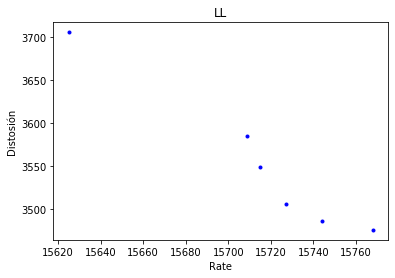

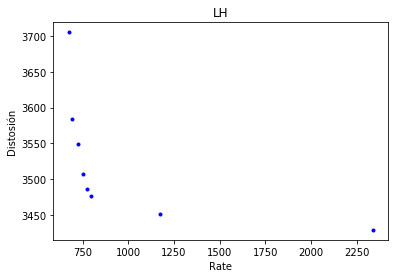

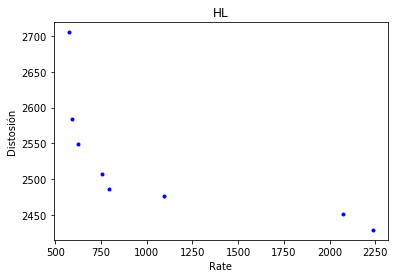

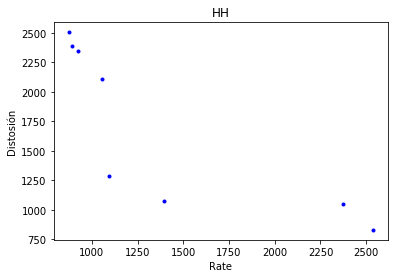

In [52]:
def graficar1(lx,f1,titulo):
    plt.figure()  # Comenzamos un nuevo gráfico (figura)
    plt.title(titulo)
    plt.xlabel("Rate")
    plt.ylabel("Distosión")
    indice = np.arange(1000)   # Declara un array
    #plt.xticks(indice, ("Q1", "B", "C", "D", "E", "F", "G", "H"))  
    plt.plot(lx, f1, 'b.')
graficar1(listaXLHimg0,listaLLimg0,"LL")
graficar1(listaXLHimg1,listaLLimg1,"LH")
graficar1(listaXLHimg2,litaLLimg2,"HL")
graficar1(listaXLHimg3,listaLLimg3,"HH")

In [54]:
C = 4 # Number of curves
# Lists of operational RD (Rate/Distortion) points
#listaMseXc1.pop()
#listaMseYc1.pop()
curve = [None]*C
curve[0] =list(zip(listaXLHimg0,listaLLimg0)) # (Rate, Distortion)
curve[1] = list(zip(listaXLHimg1,listaLLimg1))
curve[2] =list(zip(listaXLHimg2,litaLLimg2)) # (Rate, Distortion)
curve[3] = list(zip(listaXLHimg3,listaLLimg3))


In [55]:
slopes = [None]*C
for c in range(C):
    # Slopes of each pair of points
    slopes[c] = [] 
    for i in range(len(curve[c])-1):
        distortion_decrease = curve[c][i][1] - curve[c][i+1][1]
        rate_increase = curve[c][i+1][0] - curve[c][i][0]
        slope = distortion_decrease/rate_increase
        slopes[c].append((slope, rate_increase, c))
    print(slopes[c])


[(1.4366319444444462, 84, 0), (5.843276515151501, 6, 0), (3.5729166666666665, 12, 0), (1.1584781639928812, 17, 0), (0.45127051767677057, 24, 0)]
[(6.033854166666674, 20, 1), (1.1686553030303002, 30, 1), (1.4291666666666667, 30, 1), (0.9847064393939491, 20, 1), (0.5415246212121246, 20, 1), (0.0650044856459329, 380, 1), (0.01912976413620747, 1164, 1)]
[(6.033854166666674, 20, 2), (1.1686553030303002, 30, 2), (0.3199626865671642, 134, 2), (0.5470591329966383, 36, 2), (0.03610164141414164, 300, 2), (0.025205820964749492, 980, 2), (0.13577466740576521, 164, 2)]
[(6.033854166666674, 20, 3), (1.1686553030303002, 30, 3), (1.8125, 134, 3), (22.76928135521886, 36, 3), (0.7027683080808083, 300, 3), (0.025205820964749492, 980, 3), (1.3552868625277164, 164, 3)]


In [56]:
total_slopes = []
for c in range(C):
    total_slopes += slopes[c]
print(total_slopes)

[(1.4366319444444462, 84, 0), (5.843276515151501, 6, 0), (3.5729166666666665, 12, 0), (1.1584781639928812, 17, 0), (0.45127051767677057, 24, 0), (6.033854166666674, 20, 1), (1.1686553030303002, 30, 1), (1.4291666666666667, 30, 1), (0.9847064393939491, 20, 1), (0.5415246212121246, 20, 1), (0.0650044856459329, 380, 1), (0.01912976413620747, 1164, 1), (6.033854166666674, 20, 2), (1.1686553030303002, 30, 2), (0.3199626865671642, 134, 2), (0.5470591329966383, 36, 2), (0.03610164141414164, 300, 2), (0.025205820964749492, 980, 2), (0.13577466740576521, 164, 2), (6.033854166666674, 20, 3), (1.1686553030303002, 30, 3), (1.8125, 134, 3), (22.76928135521886, 36, 3), (0.7027683080808083, 300, 3), (0.025205820964749492, 980, 3), (1.3552868625277164, 164, 3)]


In [57]:
sorted_slopes = sorted(total_slopes, key=lambda tup: tup[0])[::-1]
print(sorted_slopes)

[(22.76928135521886, 36, 3), (6.033854166666674, 20, 3), (6.033854166666674, 20, 2), (6.033854166666674, 20, 1), (5.843276515151501, 6, 0), (3.5729166666666665, 12, 0), (1.8125, 134, 3), (1.4366319444444462, 84, 0), (1.4291666666666667, 30, 1), (1.3552868625277164, 164, 3), (1.1686553030303002, 30, 3), (1.1686553030303002, 30, 2), (1.1686553030303002, 30, 1), (1.1584781639928812, 17, 0), (0.9847064393939491, 20, 1), (0.7027683080808083, 300, 3), (0.5470591329966383, 36, 2), (0.5415246212121246, 20, 1), (0.45127051767677057, 24, 0), (0.3199626865671642, 134, 2), (0.13577466740576521, 164, 2), (0.0650044856459329, 380, 1), (0.03610164141414164, 300, 2), (0.025205820964749492, 980, 3), (0.025205820964749492, 980, 2), (0.01912976413620747, 1164, 1)]


In [59]:
R = 6.4# Bit budget
spent_br = 0 # Spent bit rate
i = 0
optimal_progression = []
while True:
    spent_br += sorted_slopes[i][1]
    if spent_br < R:
        optimal_progression.append(sorted_slopes[i])
    else:
        break
    i += 1
print("Optimal progression of RD points =", optimal_progression)
br = sum([i[1] for i in optimal_progression])
print("Achieved rate =", br)
for c in range(C): # 2 = two curves
    br = sum([i[1] for i in optimal_progression if i[2] == c])
    print("Rate for curve {} = {}".format(c,br))


Optimal progression of RD points = []
Achieved rate = 0
Rate for curve 0 = 0
Rate for curve 1 = 0
Rate for curve 2 = 0
Rate for curve 3 = 0
